# Ensemble Techniques

1. Bagging - Random Forest
2. Boosting - gradient Boosting , XGBoost

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# step 1 - Data Ingestion

In [3]:
import pandas as pd
df=pd.read_csv('train_loan.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# Target Feature - Loan Status
1. 0 - Loan Rejected
2. 1 - Loan Approved

# Step 2 - Perform Basic Data quality checks


In [4]:
df.shape

(58645, 13)

In [5]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.select_dtypes(include='object').nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

# Step 3 - Seperate X and Y(loan_status)


In [8]:
x = df.drop(columns=['id', 'loan_status'])
y= df['loan_status']

In [9]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [11]:
y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

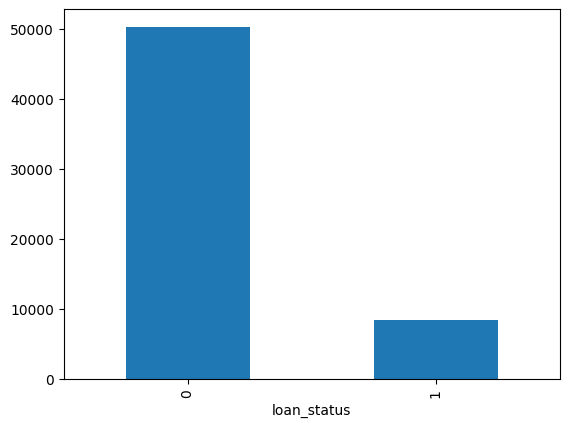

In [12]:
y.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

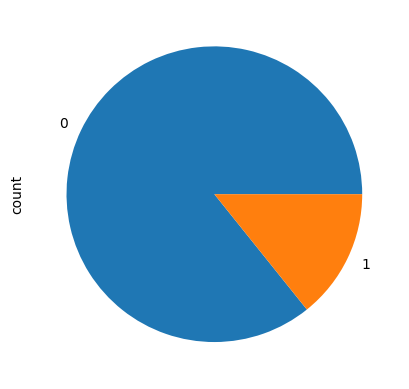

In [13]:
y.value_counts().plot(kind='pie')

# Step 4 - Apply Train Test Split


In [14]:
from sklearn.model_selection import train_test_split

xtrain , xtest, ytrain , ytest = train_test_split(x,y , test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15
17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9
32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3
55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11
40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2


In [16]:
ytrain.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

In [17]:
xtest.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4
56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4
42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6
10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2
39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10


In [18]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [19]:
xtrain.shape

(46916, 11)

In [20]:
xtest.shape


(11729, 11)

# Step 5 - Apply Preprocessing pipeline on X


In [21]:
cat_cols = x.select_dtypes(include='object').columns.tolist()
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [22]:
num_cols = x.select_dtypes(include= 'number').columns.tolist()
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer


In [24]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [25]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore' , sparse_output=False , drop='first'),

)

In [26]:
pre = ColumnTransformer(
    [
        ('num', num_pipe,num_cols),
        ('cat',cat_pipe, cat_cols)
    ]
).set_output(transform='pandas')

In [27]:
pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [28]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.397825,-0.366415,-1.182680,-0.359703,1.042717,-0.205762,2.274652,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091851,-0.542752,-0.429373,-0.755235,0.321836,-0.424086,0.787969,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422891,0.152225,-1.182680,-0.215873,-0.922425,-0.533248,-0.698714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.894383,0.281885,-0.680475,1.042639,-1.363513,0.449211,1.283530,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.919449,-0.480515,0.072832,-0.935022,-0.994843,-0.751573,-0.946495,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.753930,-0.625734,-1.182680,-0.988958,-0.882925,-0.751573,-0.450934,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422891,-0.107095,1.077242,-0.755235,-0.688715,-0.860735,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.735746,0.056277,-1.182680,1.941575,0.608214,1.104183,0.044628,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.919449,-0.885054,-1.182680,-0.755235,-0.030376,0.121724,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091851,-0.107095,-0.931577,-0.395660,0.502879,-0.424086,1.035750,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 6 - Perform Model training
Random Forest


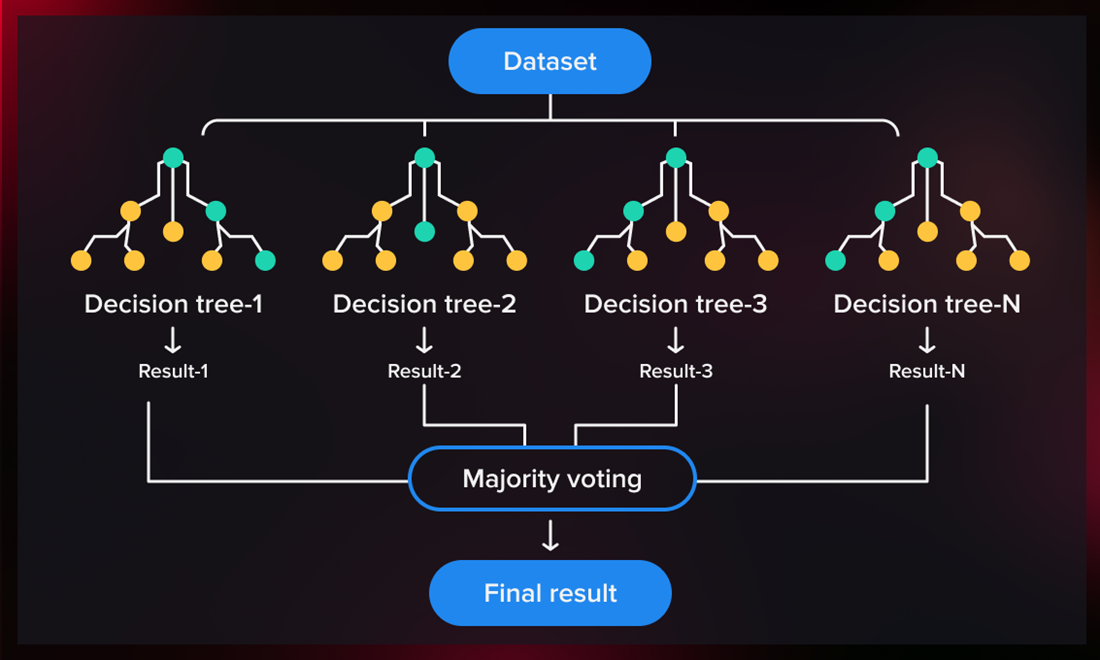

In [30]:

from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="entropy",
)
model1.fit(xtrain_pre, ytrain)

,n_estimators,1
,criterion,'entropy'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
model1.score(xtrain_pre, ytrain)


0.8892062409412567

In [32]:
model1.score(xtest_pre, ytest)


0.8898456816437889

# Hyperparameter tuning


In [33]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)
params1 = {"n_estimators": [10, 50, 100, 200], "max_depth": [3, 4, 5, 6]}
rscv_rf = RandomizedSearchCV(rf, params1, cv=5, scoring="f1_macro", random_state=42)
rscv_rf.fit(xtrain_pre, ytrain)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [3, 4, ...], 'n_estimators': [10, 50, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [34]:
rscv_rf.best_params_


{'n_estimators': 100, 'max_depth': 6}

In [35]:
rscv_rf.best_score_


np.float64(0.8597076876289227)

In [36]:

best_rf = rscv_rf.best_estimator_
best_rf

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
best_rf.score(xtrain_pre, ytrain)


0.9420879870406684

In [38]:
best_rf.score(xtest_pre, ytest)


0.9424503367721033

# Gradient Boosting

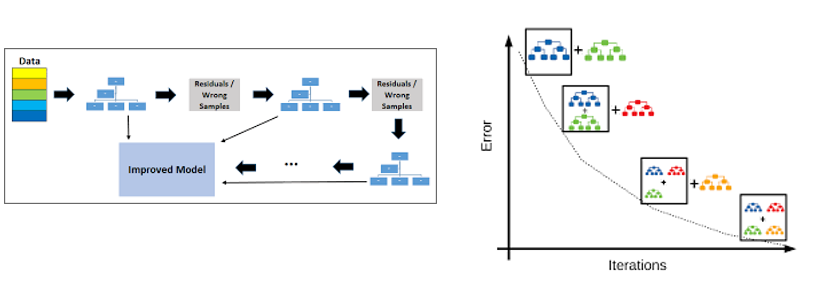

In [39]:

from sklearn.ensemble import HistGradientBoostingClassifier

model2 = HistGradientBoostingClassifier(
    max_iter=1,
    learning_rate=0.1,
    max_depth=1,
    min_samples_leaf=5,
)
model2.fit(xtrain_pre, ytrain)

,loss,'log_loss'
,learning_rate,0.1
,max_iter,1
,max_leaf_nodes,31
,max_depth,1
,min_samples_leaf,5
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [40]:
model2.score(xtrain_pre, ytrain)


0.8570210589138034

In [41]:
model2.score(xtest_pre, ytest)


0.8600051155256203

# Hyperparameter tuning of Gradient Boost


In [42]:
gbc = HistGradientBoostingClassifier(random_state=42)
params2 = {
    "max_iter": [10, 50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5, 6],
}
rscv_gb = RandomizedSearchCV(gbc, params2, cv=5, scoring="f1_macro", random_state=42)
rscv_gb.fit(xtrain_pre, ytrain)

,estimator,HistGradientB...ndom_state=42)
,param_distributions,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'max_iter': [10, 50, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [43]:
rscv_gb.best_params_


{'max_iter': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [44]:
rscv_gb.best_score_


np.float64(0.8886319357992777)

In [45]:
best_gb = rscv_gb.best_estimator_
best_gb

,loss,'log_loss'
,learning_rate,0.1
,max_iter,200
,max_leaf_nodes,31
,max_depth,5
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [46]:
best_gb.score(xtrain_pre, ytrain)


0.957647710802285

In [47]:
best_gb.score(xtest_pre, ytest)


0.9522550942109301

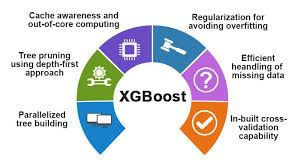

# xgboost is faster than normal boosting algo

In [48]:

!uv add xgboost

Resolved 123 packages in 5ms
Audited 117 packages in 3ms


In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(max_depth=3, n_estimators=200, random_state=42)
scores = cross_val_score(xgb_model, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores

array([0.88541872, 0.8850902 , 0.90034974, 0.89568548, 0.88545212])

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(max_depth=3, n_estimators=200, random_state=42)
scores = cross_val_score(xgb_model, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores

array([0.88541872, 0.8850902 , 0.90034974, 0.89568548, 0.88545212])

In [51]:
scores.mean()


np.float64(0.890399250285452)

In [52]:
scores.mean()

np.float64(0.890399250285452)

In [53]:
scores.std()

np.float64(0.006394094543932945)

In [55]:
xgb_model.fit(xtrain_pre,ytrain)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [56]:
xgb_model.score(xtrain_pre, ytrain)

0.9557507033847727

In [57]:
xgb_model.score(xtest_pre,ytest)

0.9516582828885668

# From above it is clear XGBoost has highest cross validation results compared to other models
# Evaluate xgboost model in detail

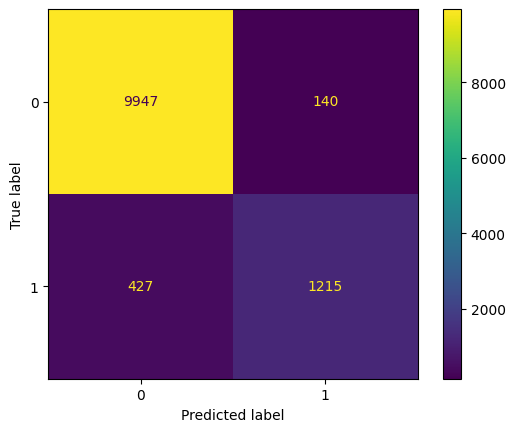

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_model, xtest_pre,ytest)

In [59]:
from sklearn.metrics import classification_report

ypred_test = xgb_model.predict(xtest_pre)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



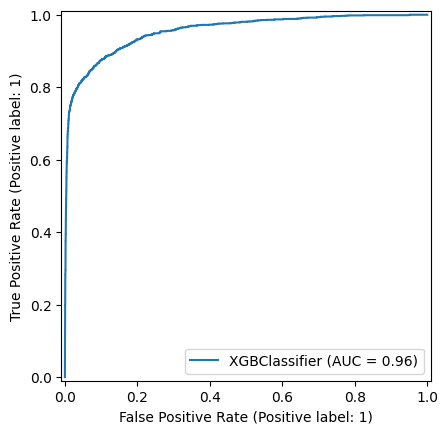

In [60]:
# USE ONLY FOR BINARY CLASSIFICATION
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xgb_model, xtest_pre, ytest)

# All above metrics confirm i can use this model for out of sample predciction
# Show feature importances

In [61]:
xgb_model.feature_importances_


array([0.00685179, 0.02497296, 0.02368544, 0.00590173, 0.05614733,
       0.17617631, 0.00391954, 0.00320896, 0.06182006, 0.14229995,
       0.01758853, 0.03553832, 0.05756287, 0.0126067 , 0.02339909,
       0.00777092, 0.02807231, 0.28637767, 0.01549417, 0.00298723,
       0.00161175, 0.00600633], dtype=float32)

In [62]:
xtrain_pre.columns


Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length', 'cat__person_home_ownership_OTHER',
       'cat__person_home_ownership_OWN', 'cat__person_home_ownership_RENT',
       'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT',
       'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL',
       'cat__loan_intent_VENTURE', 'cat__loan_grade_B', 'cat__loan_grade_C',
       'cat__loan_grade_D', 'cat__loan_grade_E', 'cat__loan_grade_F',
       'cat__loan_grade_G', 'cat__cb_person_default_on_file_Y'],
      dtype='object')

In [63]:
imp = pd.Series(xgb_model.feature_importances_, index=xtrain_pre.columns)
imp

num__person_age                     0.006852
num__person_income                  0.024973
num__person_emp_length              0.023685
num__loan_amnt                      0.005902
num__loan_int_rate                  0.056147
num__loan_percent_income            0.176176
num__cb_person_cred_hist_length     0.003920
cat__person_home_ownership_OTHER    0.003209
cat__person_home_ownership_OWN      0.061820
cat__person_home_ownership_RENT     0.142300
cat__loan_intent_EDUCATION          0.017589
cat__loan_intent_HOMEIMPROVEMENT    0.035538
cat__loan_intent_MEDICAL            0.057563
cat__loan_intent_PERSONAL           0.012607
cat__loan_intent_VENTURE            0.023399
cat__loan_grade_B                   0.007771
cat__loan_grade_C                   0.028072
cat__loan_grade_D                   0.286378
cat__loan_grade_E                   0.015494
cat__loan_grade_F                   0.002987
cat__loan_grade_G                   0.001612
cat__cb_person_default_on_file_Y    0.006006
dtype: flo

In [64]:
sort_imp = imp.sort_values(ascending=False)
sort_imp

cat__loan_grade_D                   0.286378
num__loan_percent_income            0.176176
cat__person_home_ownership_RENT     0.142300
cat__person_home_ownership_OWN      0.061820
cat__loan_intent_MEDICAL            0.057563
num__loan_int_rate                  0.056147
cat__loan_intent_HOMEIMPROVEMENT    0.035538
cat__loan_grade_C                   0.028072
num__person_income                  0.024973
num__person_emp_length              0.023685
cat__loan_intent_VENTURE            0.023399
cat__loan_intent_EDUCATION          0.017589
cat__loan_grade_E                   0.015494
cat__loan_intent_PERSONAL           0.012607
cat__loan_grade_B                   0.007771
num__person_age                     0.006852
cat__cb_person_default_on_file_Y    0.006006
num__loan_amnt                      0.005902
num__cb_person_cred_hist_length     0.003920
cat__person_home_ownership_OTHER    0.003209
cat__loan_grade_F                   0.002987
cat__loan_grade_G                   0.001612
dtype: flo

<Axes: title={'center': 'Feature Importances'}>

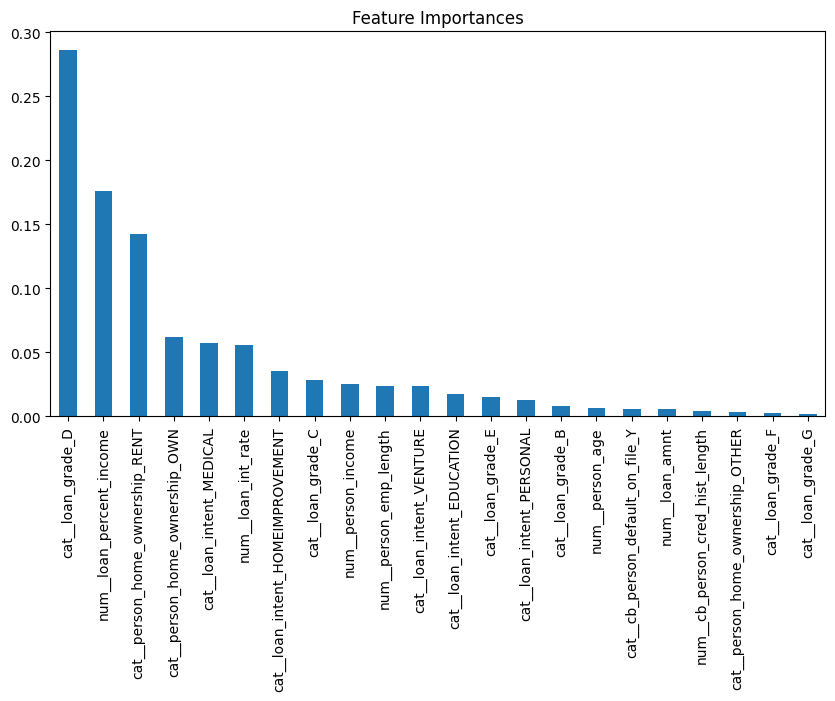

In [65]:
sort_imp.plot(kind="bar", figsize=(10, 5), title="Feature Importances")


<Axes: title={'center': 'Top 5 important Features'}>

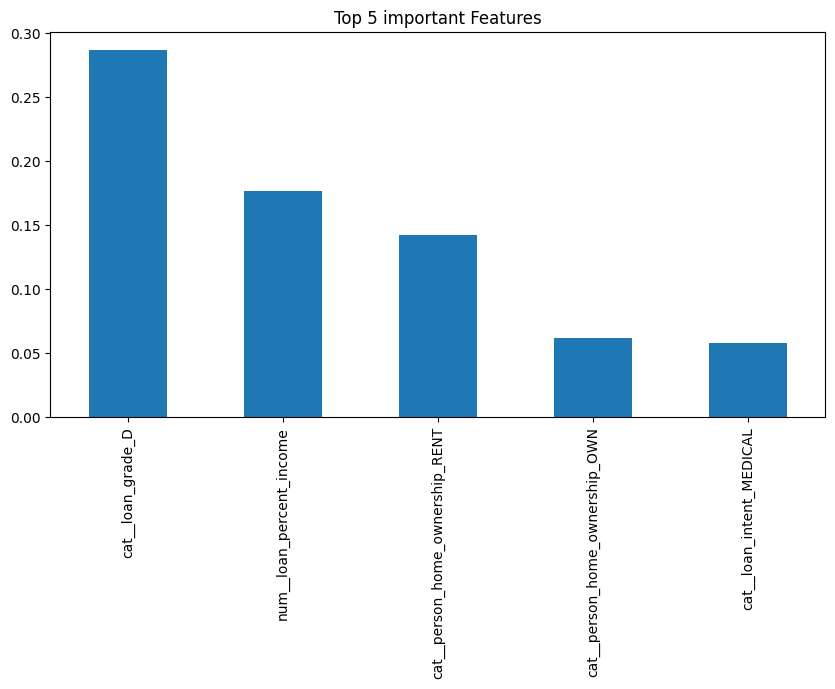

In [66]:
sort_imp.head(5).plot(kind="bar", figsize=(10, 5), title="Top 5 important Features")


# Step 8 - Out of Sample Prediction


In [67]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [68]:
pre


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [69]:

xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.753930,0.126293,-0.429373,2.840512,1.671432,2.195805,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257371,0.826456,0.323935,0.143702,0.657589,-0.642411,-0.450934,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257371,-0.885054,0.072832,-0.935022,2.142144,-0.314924,-0.946495,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.901266,-0.366415,-0.178270,-0.395660,-0.586672,-0.205762,0.292408,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257371,0.982048,0.826140,1.042639,1.855767,-0.096600,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
preds = xgb_model.predict(xnew_pre)
preds[0:5]

array([1, 0, 0, 0, 0])

In [71]:
xgb_model.classes_


array([0, 1])

In [72]:
probs = xgb_model.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.9990871 , 0.02071296, 0.4513934 , 0.00548314, 0.04729035],
      dtype=float32)

In [73]:
res = xnew[["id"]]
res

,id
0,58645
1,58646
2,58647
3,58648
4,58649
...,...
39093,97738
39094,97739
39095,97740
39096,97741


In [74]:
res["loan_status"] = preds
res["approval_prob"] = probs.round(4)

In [75]:

res

,id,loan_status,approval_prob
0,58645,1,0.9991
1,58646,0,0.0207
2,58647,0,0.4514
3,58648,0,0.0055
4,58649,0,0.0473
...,...,...,...
39093,97738,0,0.0707
39094,97739,0,0.0047
39095,97740,0,0.0047
39096,97741,0,0.2470


In [76]:
res.query("loan_status == 1")


,id,loan_status,approval_prob
0,58645,1,0.9991
5,58650,1,0.9427
8,58653,1,0.5905
28,58673,1,0.7334
35,58680,1,0.9879
...,...,...,...
39085,97730,1,0.9783
39088,97733,1,0.8372
39089,97734,1,0.9869
39090,97735,1,0.9376


In [77]:
res["loan_status"].value_counts()


loan_status
0    34761
1     4337
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

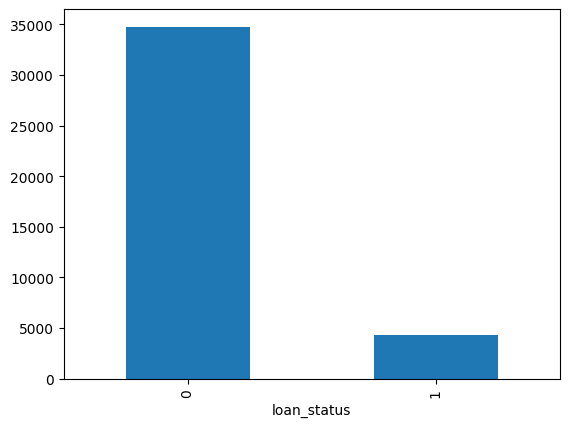

In [78]:
res["loan_status"].value_counts().plot(kind="bar")


In [79]:
res.to_csv("xgb_results.csv", index=False)


# Save the pre and best model


In [80]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [81]:
joblib.dump(xgb_model, "xgb_model.joblib")


['xgb_model.joblib']

# Load model object


In [82]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [83]:
m = joblib.load("xgb_model.joblib")
m

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [84]:
m.score(xtrain_pre, ytrain)


0.9557507033847727

In [85]:
m.score(xtest_pre, ytest)


0.9516582828885668